# Experiments with TensorFlow and Keras API

## Goal
We'll check a classification model (MobileNet-V2) behavior on CIFAR-100 dataset with **TensorFlow**.
The data in this set consists in 60.000 colored images 32x32 in 100 classes, with 600 images per class. 100 classes at CIFAR-100 are grouped in 20 superclasses. Each image comes with a "fine" label (the class which it belongs) and a "coarse" label (the superclass which it belongs). There are 500 training images and 100 test images by class.

# Importing packages

In [3]:
!pip install tensorflow

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow as tf

# Load CIFAR-100 data

We will rely on CIFAR-100 dataset already provided by Keras API.

From the data we`ll extract both train and test sets.

In [2]:
cifar = tf.keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar.load_data(label_mode="fine")

# Dataset visualization

We can extract some images from loaded dataset to clear view what type of classification we are aiming to do.

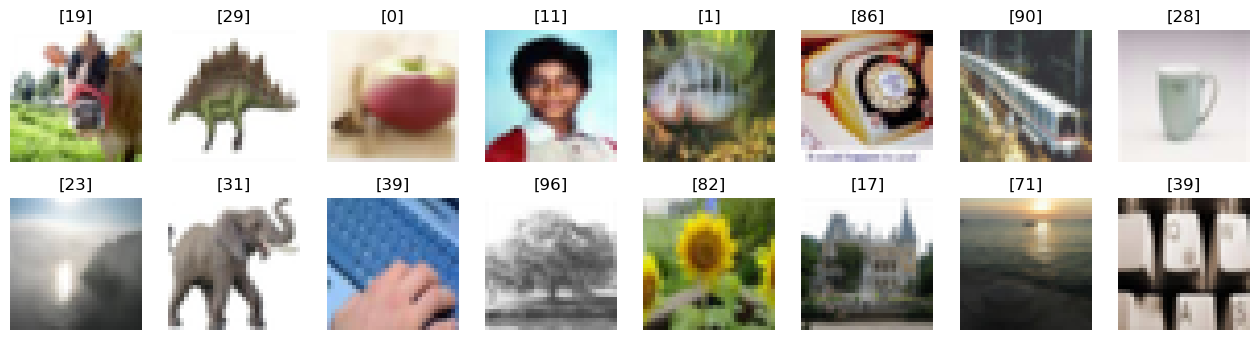

In [8]:
lines  = 2
columns = 8

fig, axs = plt.subplots(lines, columns, figsize=(16, 4))
# vectorize image for indexing instead of referentiating a specific position at dataset matrix
axs      = axs.flatten()

for i in range(lines * columns):
    axs[i].imshow(x_train[i], cmap='gray_r')
    axs[i].set_title(str(y_train[i]))
    axs[i].axis('off')

plt.show()

# Pre processing data

Before feeding data into the model it is recommendable we pre-process them to avoid overfitting. In this case we`ll simply normalize pixel values, one by one, dividing them for the maximum value 255.

In [5]:
x_train, x_test = x_train/255, x_test/255

# Defining model
MobileNetV2 model is a Convolutional Neural Network (CNN) compact and efficient, specifically projected to mobile dispositives and low potency applications, in which performance and efficience are critical. It was introduced by Google in 2018 as an improvement of previous MobileNetV1, bringing more precision and computational efficience.

In this document we will use MobileNetV2.

In [12]:
mobileNet = tf.keras.applications.MobileNetV2((32, 32, 3), classes=100, weights=None)
mobileNet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Training model
Now that we just compiled our model, we will train it with 10 epochs and batch_size=32

In [14]:
history_m1 = mobileNet.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          batch_size=32)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 236s 132ms/step - accuracy: 0.0125 - loss: 4.9049 - val_accuracy: 0.0100 - val_loss: 4.6143
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 211s 135ms/step - accuracy: 0.0179 - loss: 4.6900 - val_accuracy: 0.0100 - val_loss: 4.6508
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 226s 144ms/step - accuracy: 0.0234 - loss: 4.6012 - val_accuracy: 0.0100 - val_loss: 4.6776
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 197s 126ms/step - accuracy: 0.0265 - loss: 4.5260 - val_accuracy: 0.0109 - val_loss: 4.7138
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 184s 118ms/step - accuracy: 0.0334 - loss: 4.4614 - val_accuracy: 0.0219 - val_loss: 4.5647
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 199s 127ms/step - accuracy: 0.0372 - loss: 4.3926 - val_accuracy: 0.0418 - val_loss: 4.3755
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 205s 131ms/step - accuracy: 0.0431 - loss: 4.3479 - val_accuracy: 0.0468 - val_loss: 4.3246
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 191s 122ms/step - ac

If we add a pooling layer into the model 

In [16]:
fineClassificationModel_with_avg_pooling = tf.keras.applications.MobileNetV2((32, 32, 3), classes=100, weights=None, pooling='avg')
fineClassificationModel_with_avg_pooling.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [17]:
history_m2 = fineClassificationModel_with_avg_pooling.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          batch_size=32)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 221s 123ms/step - accuracy: 0.0111 - loss: 4.9309 - val_accuracy: 0.0100 - val_loss: 4.6118
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 219s 140ms/step - accuracy: 0.0164 - loss: 4.7187 - val_accuracy: 0.0100 - val_loss: 4.6373
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 195s 125ms/step - accuracy: 0.0203 - loss: 4.6363 - val_accuracy: 0.0100 - val_loss: 4.6594
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 129ms/step - accuracy: 0.0233 - loss: 4.5783 - val_accuracy: 0.0097 - val_loss: 4.6995
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 212s 136ms/step - accuracy: 0.0276 - loss: 4.5279 - val_accuracy: 0.0174 - val_loss: 4.6173
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 200s 128ms/step - accuracy: 0.0314 - loss: 4.4889 - val_accuracy: 0.0330 - val_loss: 4.4860
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 212s 136ms/step - accuracy: 0.0355 - loss: 4.4499 - val_accuracy: 0.0372 - val_loss: 4.4756
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 219s 140ms/step - ac

We can modify pooling mechanism to analyze the impact on model training results

In [19]:
fineClassificationModel_with_max_pooling = tf.keras.applications.MobileNetV2((32, 32, 3), classes=100, weights=None, pooling='max')
fineClassificationModel_with_max_pooling.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [20]:
history_m3 = fineClassificationModel_with_max_pooling.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          batch_size=32)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 272s 148ms/step - accuracy: 0.0100 - loss: 4.9283 - val_accuracy: 0.0100 - val_loss: 4.6117
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 198s 127ms/step - accuracy: 0.0134 - loss: 4.7661 - val_accuracy: 0.0100 - val_loss: 4.6348
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 196s 125ms/step - accuracy: 0.0182 - loss: 4.6951 - val_accuracy: 0.0100 - val_loss: 4.6501
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 195s 125ms/step - accuracy: 0.0187 - loss: 4.6561 - val_accuracy: 0.0104 - val_loss: 4.6731
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 254s 162ms/step - accuracy: 0.0239 - loss: 4.6054 - val_accuracy: 0.0166 - val_loss: 4.6419
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 195s 125ms/step - accuracy: 0.0261 - loss: 4.5620 - val_accuracy: 0.0312 - val_loss: 4.5495
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 209s 134ms/step - accuracy: 0.0301 - loss: 4.5108 - val_accuracy: 0.0341 - val_loss: 4.5439
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 247s 158ms/step - ac

In [9]:
fineClassificationModel_with_softmax = tf.keras.applications.MobileNetV2((32, 32, 3), classes=100, weights=None, pooling='avg', include_top=True, classifier_activation='softmax')
fineClassificationModel_with_softmax.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [11]:
history_with_softmax_layer = fineClassificationModel_with_softmax.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          batch_size=32)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 230s 125ms/step - accuracy: 0.0116 - loss: 4.9118 - val_accuracy: 0.0100 - val_loss: 4.6123
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 192s 123ms/step - accuracy: 0.0178 - loss: 4.7025 - val_accuracy: 0.0100 - val_loss: 4.6385
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 179s 114ms/step - accuracy: 0.0210 - loss: 4.6269 - val_accuracy: 0.0100 - val_loss: 4.6560
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 180s 115ms/step - accuracy: 0.0264 - loss: 4.5607 - val_accuracy: 0.0099 - val_loss: 4.6696
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 181s 116ms/step - accuracy: 0.0317 - loss: 4.5020 - val_accuracy: 0.0199 - val_loss: 4.5693
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 183s 117ms/step - accuracy: 0.0370 - loss: 4.4379 - val_accuracy: 0.0405 - val_loss: 4.4278
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 182s 116ms/step - accuracy: 0.0413 - loss: 4.3945 - val_accuracy: 0.0438 - val_loss: 4.3943
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 179s 115ms/step - ac

In [14]:
fineClassificationModel_with_decay_learning_rate = tf.keras.applications.MobileNetV2((32, 32, 3), classes=100, weights=None, pooling='avg', include_top=True, classifier_activation='softmax')

# lr decay function
def lr_decay(epoch):
  return 0.007 * math.pow(0.666, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

fineClassificationModel_with_decay_learning_rate.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [16]:
history_with_decay_learning_rate = fineClassificationModel_with_decay_learning_rate.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          callbacks=[lr_decay_callback],
                          batch_size=32)


Epoch 1: LearningRateScheduler setting learning rate to 0.007.
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 239s 136ms/step - accuracy: 0.0161 - loss: 5.1451 - val_accuracy: 0.0100 - val_loss: 4.7376 - learning_rate: 0.0070

Epoch 2: LearningRateScheduler setting learning rate to 0.004662.
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 192s 123ms/step - accuracy: 0.0509 - loss: 4.1147 - val_accuracy: 0.0120 - val_loss: 4.6536 - learning_rate: 0.0047

Epoch 3: LearningRateScheduler setting learning rate to 0.0031048920000000006.
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 183s 117ms/step - accuracy: 0.0734 - loss: 3.9300 - val_accuracy: 0.0379 - val_loss: 5.9845 - learning_rate: 0.0031

Epoch 4: LearningRateScheduler setting learning rate to 0.0020678580720000007.
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 179s 114ms/step - accuracy: 0.0882 - loss: 3.8069 - val_accuracy: 0.0373 - val_loss: 8.3743 - learning_rate: 0.0021

Epoch 5: LearningRateScheduler setting learning rate to 0.001377193475952000

In [23]:
fineClassificationModel_with_decay_learning_rate_v2 = tf.keras.applications.MobileNetV2((32, 32, 3), classes=100, weights=None, pooling='avg', include_top=True, classifier_activation='softmax')

# lr decay function
def lr_decay(epoch):
  return 0.004 * math.pow(0.666, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

fineClassificationModel_with_decay_learning_rate_v2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [24]:
history_m4 = fineClassificationModel_with_decay_learning_rate_v2.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          callbacks=[lr_decay_callback],
                          batch_size=32)


Epoch 1: LearningRateScheduler setting learning rate to 0.004.
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 249s 136ms/step - accuracy: 0.0203 - loss: 5.0789 - val_accuracy: 0.0100 - val_loss: 4.7085 - learning_rate: 0.0040

Epoch 2: LearningRateScheduler setting learning rate to 0.002664.
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 220s 141ms/step - accuracy: 0.0540 - loss: 4.0915 - val_accuracy: 0.0130 - val_loss: 4.8117 - learning_rate: 0.0027

Epoch 3: LearningRateScheduler setting learning rate to 0.0017742240000000002.
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 252s 161ms/step - accuracy: 0.0846 - loss: 3.8626 - val_accuracy: 0.0615 - val_loss: 4.2412 - learning_rate: 0.0018

Epoch 4: LearningRateScheduler setting learning rate to 0.0011816331840000002.
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 274s 175ms/step - accuracy: 0.1181 - loss: 3.6382 - val_accuracy: 0.0615 - val_loss: 5.7435 - learning_rate: 0.0012

Epoch 5: LearningRateScheduler setting learning rate to 0.000786967700544000

# Visualizing results

Training results.
Accuracy and loss.

In [13]:
def plot_resultados_modelo(history):
  fig, ax = plt.subplots(1, 2, figsize=(10, 3))
  ax      = ax.flatten()

  ax[0].plot(history.history['accuracy'], label='Training Accuracy', marker='o', color='blue')
  ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o', color='red', linestyle='--')

  ax[1].plot(history.history['loss'], label='Training Loss', marker='o', color='blue')
  ax[1].plot(history.history['val_loss'], label='Validation Loss', marker='o', color='red', linestyle='--')

  for _ in range(2):
      ax[_].set_xlabel('Epoch')
      ax[_].set_ylabel('Accuracy' if _ == 0 else 'Loss')
      ax[_].legend()
      ax[_].grid(True, linestyle=':')

In this first evaluation we defined the standard model of MobileNetV2, without any tweaks in its hyperparameters or anything.

For a quick evaluation in a non-prepared hardware for the task, we limited our training to 10 epochs in each evaluation.

As the optimizer for this task, trying to avoid our training to be stuck in local minimums, causing overfit, we selected Adam optimizer. In this evaluation, at a learning rate of 1e-5.

We can clearly see that by 4th epoch our validation started to get closer to the results obtained in training, signalizing a good adaptation from our model to new data. 

Besides that, we can also notice that from 7th epoch the gap between validation and training accuracy started to grow. With more epochs we would be able to get more conclusive assumptions, but it could be a sign of underfit due to a too soon training stop.

The loss behavior in each epoch ended up being pretty similar by the end of the training, meaning that probably we could kept training going on without much problems.

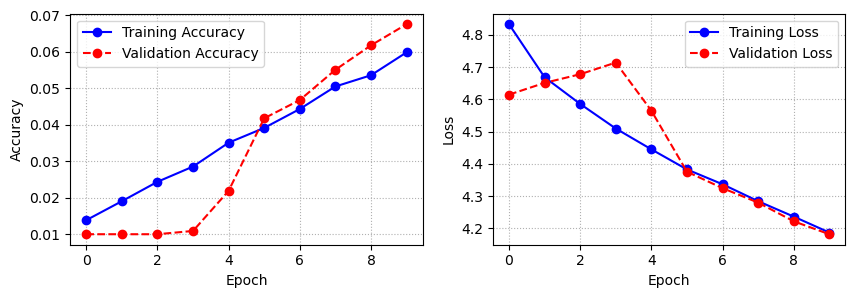

In [27]:
plot_resultados_modelo(history_m1)

Now we repeated same procedure but adding a pooling layer executing average pooling. This layer will reduce dimensionality of the problem (number of features).

We can notice that we corrected behavior discrepancy we saw by the end of training, in regards to validation accuracy. The Loss followed a similar behavior, with a bit slower pace.

In a longer training we probably would see less signs of under/overfit due to that.

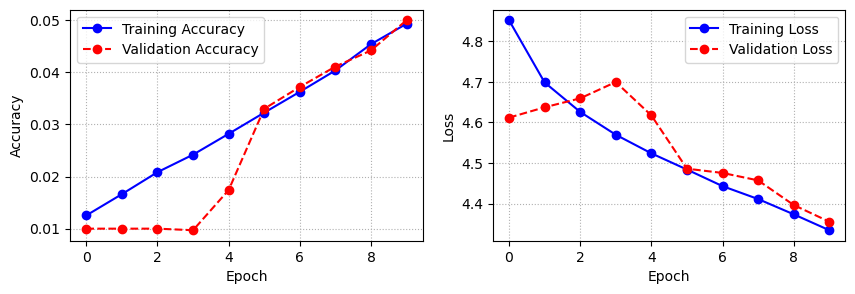

In [28]:
plot_resultados_modelo(history_m2)

Exchanging pooling technique to max-pooling we can see that both accuracy and loss are a bit more unstable. Despite that, by the end of the 10 epochs determined we can see that validation and training accuracy is pretty basically the same, identical to the average pooling test.

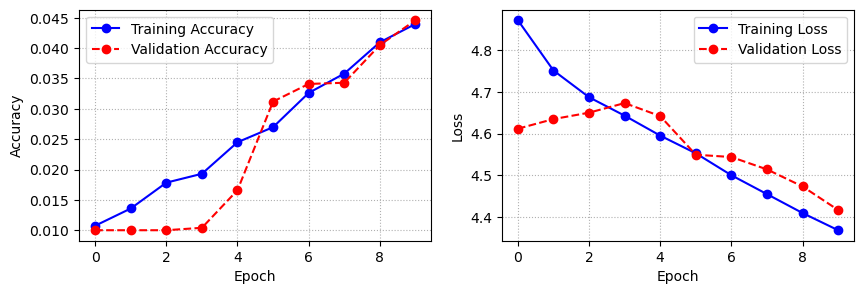

In [29]:
plot_resultados_modelo(history_m3)

Simply adding a softmax layer in the top of MobileNetV2 model shows that the behavior keeps very similar to the one already seen at the first scenario.

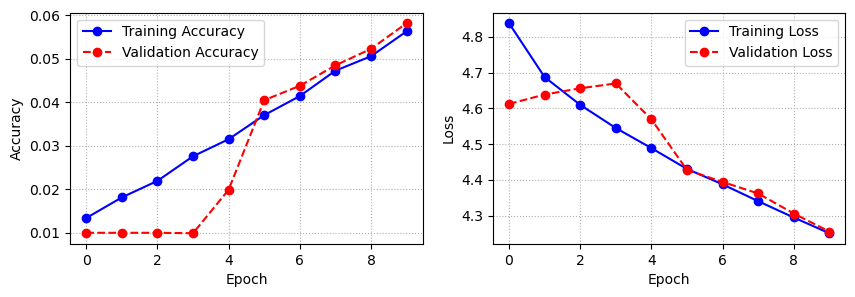

In [19]:
plot_resultados_modelo(history_with_softmax_layer)

To finalize our analysis we tried to understand losses and gains of adding a decay learning rate to the model. First by 0.007 factor and then by a more smoothy decay.

It shows a huge difference in the accuracy shown in only 10 epochs, much probably to a very faster learning rate then the ones applied with Adam optimizer.

Looking at the loss numbers, we see that it starts with a huge gap between training and validation, but as the epochs are advancing the loss keeps getting more and more similar both in training and validation, as the accuracy results too.

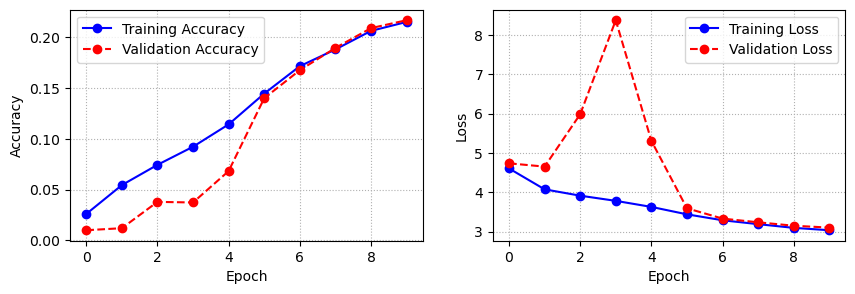

In [22]:
plot_resultados_modelo(history_with_decay_learning_rate)

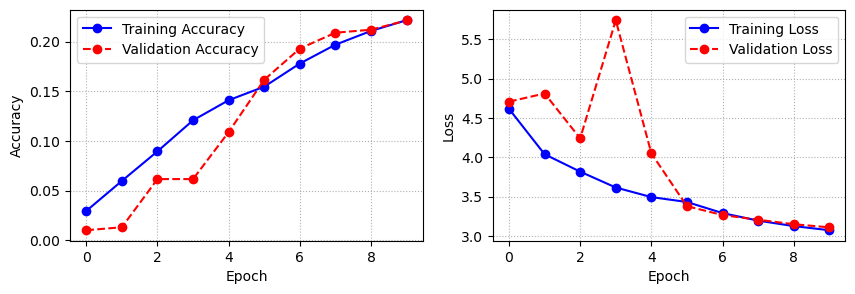

In [31]:
plot_resultados_modelo(history_m4)